In [ ]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
#Reading the training data
df=pd.read_csv('news.csv')

#Getting shape and head
df.shape
df.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

In [ ]:
#Getting the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [ ]:
X = df['text']
y = df['label']

#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
#Initializing a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fitting and transforming the train and test data
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Initializing a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

# Predicting on the test set
y_pred = pac.predict(tfidf_test)

# Calculating accuracy
score = accuracy_score(y_test, y_pred)
print('Accuracy:', '{:.2f}%'.format(score * 100))

Accuracy: 93.56%


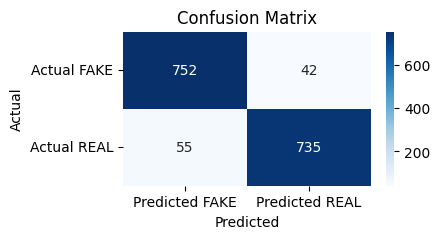

In [ ]:
#confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted FAKE', 'Predicted REAL'], yticklabels=['Actual FAKE', 'Actual REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Loading the test data which only has 'text' column
test_data = pd.read_csv('test_data.csv')
test_texts = test_data['text']

# Handling NaN values by removing rows with NaN text
test_data = test_data.dropna(subset=['text'])
test_texts = test_data['text']

# Initializing the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fitting and transforming the train data
tfidf_train = tfidf_vectorizer.fit_transform(train_texts)

# Transforming the test data
tfidf_test = tfidf_vectorizer.transform(test_texts)

# Initialize the PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)

# Fit the classifier on the training data
pac.fit(tfidf_train, train_labels)

# Make predictions on the test data
test_predictions = pac.predict(tfidf_test)

# Creating a DataFrame with the test texts and their predicted labels
predictions_df = pd.DataFrame({'text': test_texts, 'predicted_label': test_predictions})

# Save the predictions to a CSV file
predictions_df.to_csv('test_predictions.csv', index=False)

predictions_df.head()
print(predictions_df.head(10))

                                                 text predicted_label
0   UPDATE: Gov. Fallin vetoed the bill on Friday....            REAL
1   Ever since Texas laws closed about half of the...            REAL
2    to the extent that there are people running w...            FAKE
3                        that role fell to Ben Carson            REAL
5    the party’s 2008 nominee and a Vietnam War PO...            FAKE
6    he continued: “He’s a war hero because he was...            FAKE
7    the attacks on McCain will bring a swift end ...            FAKE
8    himself a candidate and a close friend of McC...            FAKE
9                 are “going to kill my party.” Trump            FAKE
10                   when he sharply criticized Obama            REAL
